In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ml work/flight fair prediction/Data_Train_lyst6947.xlsx')

In [ ]:
test = pd.read_excel('/content/drive/MyDrive/ml work/flight fair prediction/Test_set_lyst5257.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df['Journey_day'] = pd.to_datetime(df["Date_of_Journey"] , format= '%d/%m/%Y').dt.day

In [ ]:
#df.head()

In [ ]:
df['Journey_month'] = pd.to_datetime(df["Date_of_Journey"] , format= '%d/%m/%Y').dt.month

In [ ]:
#df.head()

In [ ]:
df.drop(['Date_of_Journey'], axis=1 , inplace=True)

In [ ]:
df['Dep_hour'] = pd.to_datetime(df["Dep_Time"] ).dt.hour

In [ ]:
df['Dep_min'] = pd.to_datetime(df["Dep_Time"] ).dt.minute

In [ ]:
df.drop(['Dep_Time'], axis=1 , inplace=True)

In [ ]:
#df['Dep_hour'] = pd.to_datetime(df["Dep_Time"] ).dt.hour

In [ ]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
#df.head()

In [ ]:
duration = list(df['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]


In [ ]:
#duration

In [ ]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(duration[i].split(sep = 'h')[0]) 
  duration_mins.append(duration[i].split(sep = 'm')[0].split()[-1]) 


In [ ]:
duration_hours = [int(i) for i in duration_hours]
duration_mins = [int(i) for i in duration_mins]

In [ ]:
print(duration_hours)
print(duration_mins)

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3, 27, 7,

In [ ]:
df['duration_hours'] = duration_hours
df['duration_mins'] = duration_mins

In [ ]:
df.drop(['Duration'], axis=1 , inplace=True)

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

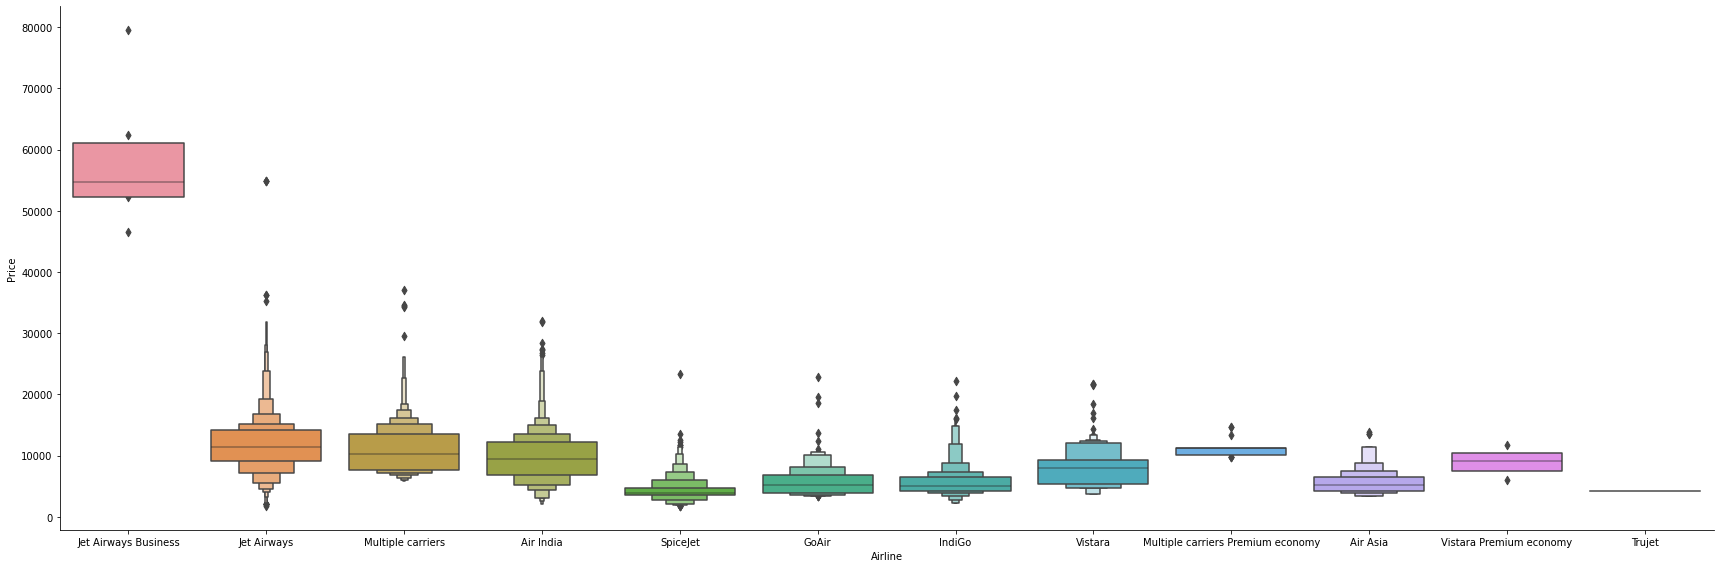

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

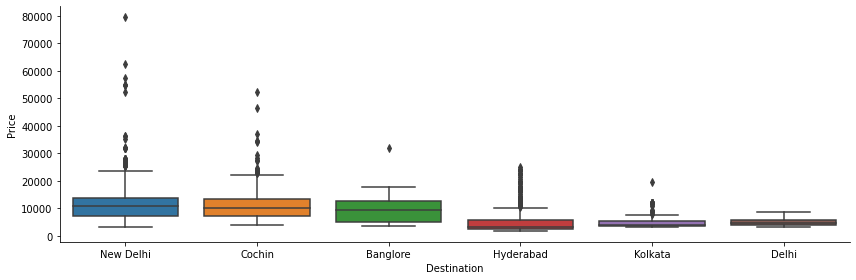

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [ ]:
#df.head()


In [ ]:
Airline = df[['Airline']]

In [ ]:
Airline = pd.get_dummies(Airline , drop_first = True)

In [ ]:
#Airline.head()

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

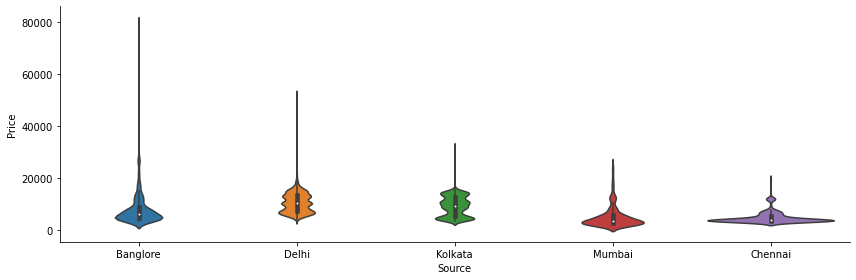

In [ ]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

In [ ]:
Source = df[['Source']]

In [ ]:
Source = pd.get_dummies(Source , drop_first = True)

In [ ]:
#Source.head()

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = df[['Destination']]

In [ ]:
Destination = pd.get_dummies(Destination , drop_first = True)

In [ ]:
#Destination.head()

In [ ]:
#df['Route']

In [ ]:
df.drop(['Route'], axis=1 , inplace=True)


In [ ]:
df.drop(['Additional_Info'], axis=1 , inplace=True)

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df.replace({'non-stop': 0 , '1 stop' : 1 , '2 stop' : 2, '3 stop': 3 , '4 stop' : 4 } , inplace = True )

In [ ]:
df.replace({'2 stops' : 2} , inplace = True )

In [ ]:
df.replace({'3 stops' : 3} , inplace = True )

In [ ]:
df.replace({'4 stops' : 4} , inplace = True )

In [ ]:
df.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
df = pd.concat([df,Airline,Source,Destination],axis=1)

In [ ]:
#df.head()

In [ ]:
df.drop(['Airline','Source','Destination'],axis=1,inplace = True)

In [ ]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(10682, 30)

In [ ]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
y = df.iloc[:,1]


In [ ]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

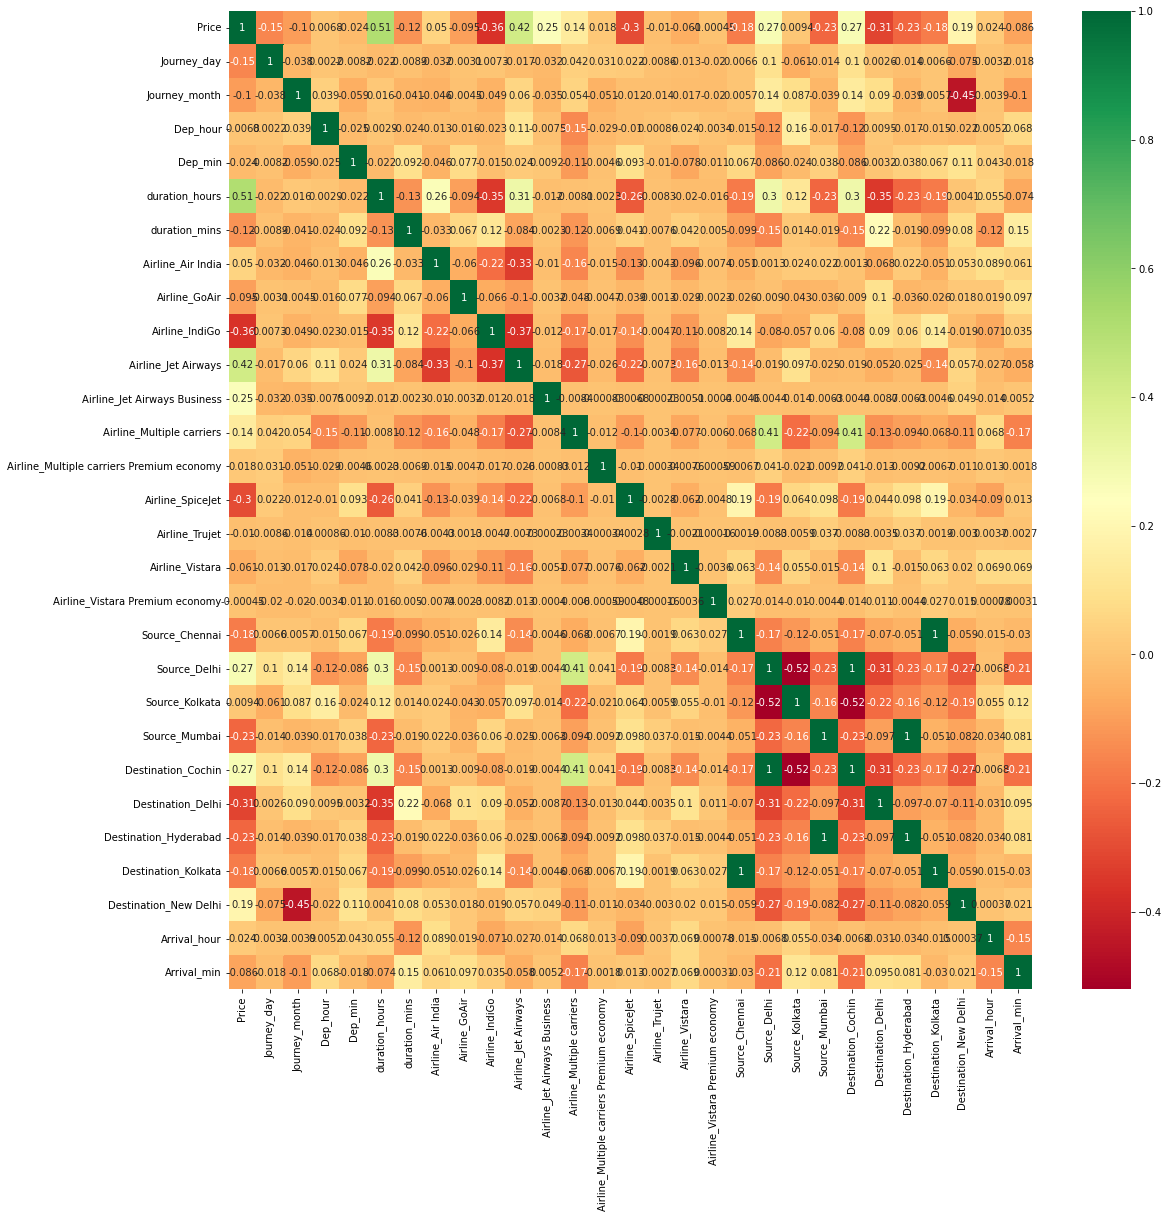

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(df,y)

ExtraTreesRegressor()

In [ ]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Arrival_hour,Arrival_min
0,0,3897,24,3,22,20,2,50,0,0,...,0,0,0,0,0,0,0,1,1,10
1,2,7662,1,5,5,50,7,25,1,0,...,0,1,0,0,0,0,0,0,13,15
2,2,13882,9,6,9,25,19,0,0,0,...,1,0,0,1,0,0,0,0,4,25
3,1,6218,12,5,18,5,5,25,0,0,...,0,1,0,0,0,0,0,0,23,30
4,1,13302,1,3,16,50,4,45,0,0,...,0,0,0,0,0,0,0,1,21,35


In [ ]:

y = df.pop('Price')
X = df


In [ ]:
X.shape

(10682, 29)

In [ ]:
test.dropna(inplace = True)
#df.isnull().sum()
test['Journey_day'] = pd.to_datetime(test["Date_of_Journey"] , format= '%d/%m/%Y').dt.day
test['Journey_month'] = pd.to_datetime(test["Date_of_Journey"] , format= '%d/%m/%Y').dt.month
test.drop(['Date_of_Journey'], axis=1 , inplace=True)
test['Dep_hour'] = pd.to_datetime(test["Dep_Time"] ).dt.hour
test['Dep_min'] = pd.to_datetime(test["Dep_Time"] ).dt.minute
test.drop(['Dep_Time'], axis=1 , inplace=True)
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)
duration = list(test['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(duration[i].split(sep = 'h')[0]) 
  duration_mins.append(duration[i].split(sep = 'm')[0].split()[-1]) 
duration_hours = [int(i) for i in duration_hours]
duration_mins = [int(i) for i in duration_mins]
test['duration_hours'] = duration_hours
test['duration_mins'] = duration_mins
test.drop(['Duration'], axis=1 , inplace=True)

In [ ]:

Airline = test[['Airline']]
Airline = pd.get_dummies(Airline , drop_first = True)
Source = test[['Source']]
Source = pd.get_dummies(Source , drop_first = True)
Destination = test[['Destination']]
Destination = pd.get_dummies(Destination , drop_first = True)
test.drop(['Route'], axis=1 , inplace=True)
test.drop(['Additional_Info'], axis=1 , inplace=True)
test.replace({'non-stop': 0 , '1 stop' : 1 , '2 stop' : 2, '3 stop': 3 , '4 stop' : 4 } , inplace = True )
test.replace({'2 stops' : 2} , inplace = True )
test.replace({'3 stops' : 3} , inplace = True )
test.replace({'4 stops' : 4} , inplace = True )
test = pd.concat([test,Airline,Source,Destination],axis=1)
test.drop(['Airline','Source','Destination'],axis=1,inplace = True)

In [ ]:
test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
print(selection.feature_importances_)

[2.08614506e-01 1.43705544e-01 5.39561709e-02 2.48234551e-02
 2.12988295e-02 2.76459988e-02 1.89087723e-02 1.43003996e-01
 1.72198964e-02 1.02516808e-02 1.72491144e-03 2.01707801e-02
 1.32213421e-01 6.70251782e-02 1.93604888e-02 9.22426598e-04
 3.55948884e-03 9.72666575e-05 4.84986335e-03 8.42017586e-05
 4.86115497e-04 1.25971779e-02 3.50983628e-03 6.25588844e-03
 1.22276747e-02 1.42544183e-02 5.90271289e-03 5.33928051e-04
 2.47953728e-02]


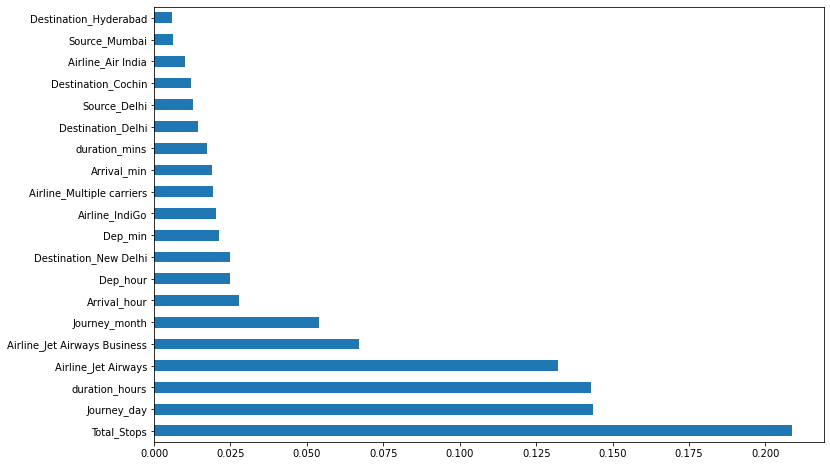

In [ ]:
plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_,index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [216]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train , y_train)

RandomForestRegressor()

In [218]:
y_pred = reg_rf.predict(X_test)

In [220]:
reg_rf.score(X_train,y_train)

0.9532822623643037

In [221]:
reg_rf.score(X_test,y_test)

0.7977512215032831

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


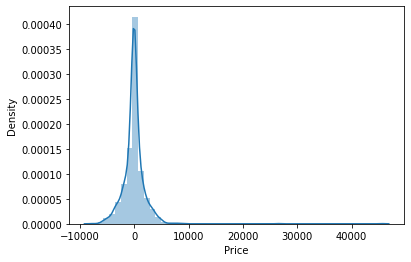

In [225]:
sns.distplot(y_test-y_pred)
plt.show()

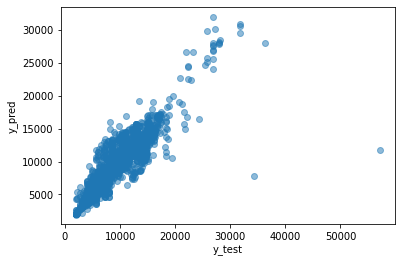

In [226]:
plt.scatter(y_test , y_pred , alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [227]:
from sklearn import metrics 


In [230]:
print('MAR', metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAR 1182.2854595664694
MSE 4360899.553439131
RMSE 2088.2766946549805


In [232]:
2080.5590/(max(y)-min(y))

0.026758568801203815

In [235]:
metrics.r2_score(y_test,y_pred)

0.7977512215032831

In [236]:
from sklearn.model_selection import RandomizedSearchCV


In [237]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [238]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [239]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [240]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [241]:
rf_random.best_params_


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [242]:
prediction = rf_random.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


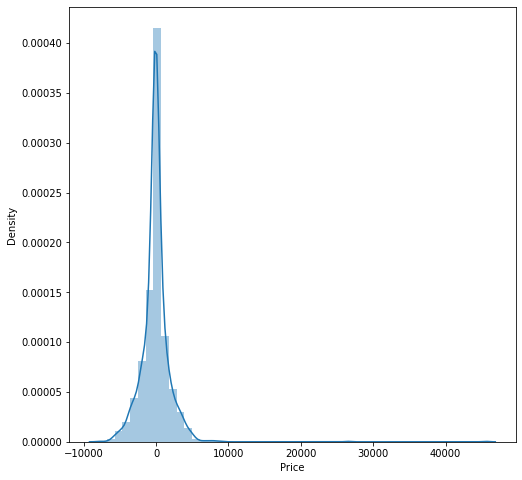

In [243]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred)
plt.show()

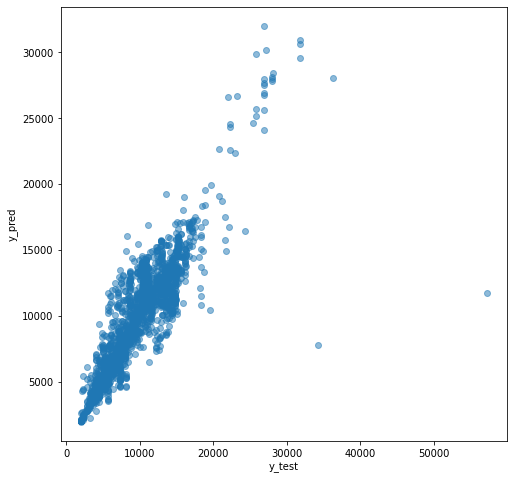

In [244]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [245]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1182.2854595664694
MSE: 4360899.553439131
RMSE: 2088.2766946549805


In [247]:
import pickle

file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [248]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [249]:
y_prediction = forest.predict(X_test)


In [252]:
metrics.r2_score(y_test, y_prediction)


0.8119124022922017